# NYC restaurants inspection - Data Challenge
Sarah Atwi, 20/02/2020

In [49]:
import scipy
import numpy as np
import matplotlib
import pandas as pd
import sklearn

# Load libraries
from pandas import read_csv
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

import datacompy


In [371]:
# Load dictionary
df1 = pd.read_excel (r'Data\Restaurant_Inspection_Open_Data_Dictionary_082214.xlsx', header=2)
#df2 = pd.read_excel (r'Data/Restaurant_Inspection_Open_Data_Dictionary_082214(1).xlsx')
#df3 = pd.read_excel (r'Data/Restaurant_Inspection_Open_Data_Dictionary_082214(1)(1).xlsx')
#df4 = pd.read_excel (r'Data/Restaurant_Inspection_Open_Data_Dictionary_082214(2).xlsx')
#df5 = pd.read_excel (r'Data/Restaurant_Inspection_Open_Data_Dictionary_082214(3).xlsx')

#names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
#Summarise the data
#shape
print(df1.shape)

df1
#df1['Description']


(19, 6)


,Dataset (File),Data Field Name,Data Type,Length,Expected Values,Description
0,WEBEXTRACT,CAMIS,Varchar,10.0,NaN,This is a unique identifier for the entity (re...
1,WEBEXTRACT,DBA,varchar,255.0,NaN,This field represents the name (doing business...
2,WEBEXTRACT,BORO,Varchar,1.0,• 1 = MANHATTAN\n• 2 = BRONX\n• 3 = BROOKLYN\n...,Borough in which the entity (restaurant) is lo...
3,WEBEXTRACT,BUILDING,Varchar,10.0,NaN,This field represents the building number for ...
4,WEBEXTRACT,STREET,Varchar,100.0,NaN,This field represents the street name at which...
5,WEBEXTRACT,ZIPCODE,Varchar,5.0,NaN,Zip code as per the address of the entity (res...
6,WEBEXTRACT,PHONE,Varchar,20.0,NaN,Phone number
7,WEBEXTRACT,CUISINE DESCRIPTION,Varchar,200.0,NaN,This field describes the entity (restaurant) c...
8,WEBEXTRACT,INSPECTION DATE,Datetime,NaN,NaN,This field represents the date of inspection. ...
9,WEBEXTRACT,ACTION,Varchar,150.0,• Violations were cited in the following area(...,This field represents the action that is assoc...


In [168]:
#look at the dictionary
print(df1.describe())
df1

           Length
count   15.000000
mean    94.866667
std    161.968192
min      1.000000
25%      3.000000
50%     10.000000
75%    125.000000
max    600.000000


,Dataset (File),Data Field Name,Data Type,Length,Expected Values,Description
0,WEBEXTRACT,CAMIS,Varchar,10.0,NaN,This is a unique identifier for the entity (re...
1,WEBEXTRACT,DBA,varchar,255.0,NaN,This field represents the name (doing business...
2,WEBEXTRACT,BORO,Varchar,1.0,• 1 = MANHATTAN\n• 2 = BRONX\n• 3 = BROOKLYN\n...,Borough in which the entity (restaurant) is lo...
3,WEBEXTRACT,BUILDING,Varchar,10.0,NaN,This field represents the building number for ...
4,WEBEXTRACT,STREET,Varchar,100.0,NaN,This field represents the street name at which...
5,WEBEXTRACT,ZIPCODE,Varchar,5.0,NaN,Zip code as per the address of the entity (res...
6,WEBEXTRACT,PHONE,Varchar,20.0,NaN,Phone number
7,WEBEXTRACT,CUISINE DESCRIPTION,Varchar,200.0,NaN,This field describes the entity (restaurant) c...
8,WEBEXTRACT,INSPECTION DATE,Datetime,NaN,NaN,This field represents the date of inspection. ...
9,WEBEXTRACT,ACTION,Varchar,150.0,• Violations were cited in the following area(...,This field represents the action that is assoc...


In [161]:
#finding out what the results txt format is
f = open('Data/DOHMH_New_York_City_Restaurant_Inspection_Results_1_of_6.txt', 'r')
resultstest = f.readlines()
f.close()
resultstest

[',CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,VIOLATION CODE,VIOLATION DESCRIPTION,CRITICAL FLAG,SCORE,GRADE,GRADE DATE,RECORD DATE,INSPECTION TYPE\n',
 '0,40511702,NOTARO RESTAURANT,MANHATTAN,635,SECOND AVENUE,10016.0,2126863400,Italian,06/15/2015,Violations were cited in the following area(s).,02B,Hot food item not held at or above 140Ã‚Âº F.,Critical,30.0,,,08/28/2017,Cycle Inspection / Initial Inspection\n',
 '1,40511702,NOTARO RESTAURANT,MANHATTAN,635,SECOND AVENUE,10016.0,2126863400,Italian,11/25/2014,Violations were cited in the following area(s).,20F,Current letter grade card not posted.,Not Critical,,,,08/28/2017,Administrative Miscellaneous / Initial Inspection\n',
 '2,50046354,VITE BAR,QUEENS,2507,BROADWAY,11106.0,3478134702,Italian,10/03/2016,Violations were cited in the following area(s).,10F,"Non-food contact surface improperly constructed. Unacceptable material used. Non-food contact surface or equipment improperly maintained 

In [332]:
#read in inspection results
results0 = pd.read_table(r'Data\DOHMH_New_York_City_Restaurant_Inspection_Results_1_of_6.txt', delimiter=',')
results1 = pd.read_table(r'Data\DOHMH_New_York_City_Restaurant_Inspection_Results_2_of_6.txt', delimiter=',')
results2 = pd.read_table(r'Data\DOHMH_New_York_City_Restaurant_Inspection_Results_3_of_6.txt', delimiter=',')
results3 = pd.read_table(r'Data\DOHMH_New_York_City_Restaurant_Inspection_Results_5_of_6.txt', delimiter=',')
results4 = pd.read_table(r'Data\DOHMH_New_York_City_Restaurant_Inspection_Results_6_of_6.txt', delimiter=',')

resultslist=[results0, results1, results2, results3, results4]


In [333]:
results1.shape
results1.dtypes


Unnamed: 0                 int64
CAMIS                      int64
DBA                       object
BORO                      object
BUILDING                  object
STREET                    object
ZIPCODE                  float64
PHONE                     object
CUISINE DESCRIPTION       object
INSPECTION DATE           object
ACTION                    object
VIOLATION CODE            object
VIOLATION DESCRIPTION     object
CRITICAL FLAG             object
SCORE                    float64
GRADE                     object
GRADE DATE                object
RECORD DATE               object
INSPECTION TYPE           object
dtype: object

In [334]:
#explore results data structure
for resultnumber in resultslist :
    print((resultnumber).columns) 

Index(['Unnamed: 0', 'CAMIS', 'DBA', 'BORO', 'BUILDING', 'STREET', 'ZIPCODE',
       'PHONE', 'CUISINE DESCRIPTION', 'INSPECTION DATE', 'ACTION',
       'VIOLATION CODE', 'VIOLATION DESCRIPTION', 'CRITICAL FLAG', 'SCORE',
       'GRADE', 'GRADE DATE', 'RECORD DATE', 'INSPECTION TYPE'],
      dtype='object')
Index(['Unnamed: 0', 'CAMIS', 'DBA', 'BORO', 'BUILDING', 'STREET', 'ZIPCODE',
       'PHONE', 'CUISINE DESCRIPTION', 'INSPECTION DATE', 'ACTION',
       'VIOLATION CODE', 'VIOLATION DESCRIPTION', 'CRITICAL FLAG', 'SCORE',
       'GRADE', 'GRADE DATE', 'RECORD DATE', 'INSPECTION TYPE'],
      dtype='object')
Index(['Unnamed: 0', 'CAMIS', 'DBA', 'BORO', 'BUILDING', 'STREET', 'ZIPCODE',
       'PHONE', 'CUISINE DESCRIPTION', 'INSPECTION DATE', 'ACTION',
       'VIOLATION CODE', 'VIOLATION DESCRIPTION', 'CRITICAL FLAG', 'SCORE',
       'GRADE', 'GRADE DATE', 'RECORD DATE', 'INSPECTION TYPE'],
      dtype='object')
Index(['Unnamed: 0', 'CAMIS', 'DBA', 'BORO', 'BUILDING', 'STREET', 'ZIPCO

In [335]:
results=pd.concat(resultslist)

In [336]:
#look at the data
print(results.shape)

(333265, 19)


In [337]:
results.head()

,Unnamed: 0,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,VIOLATION CODE,VIOLATION DESCRIPTION,CRITICAL FLAG,SCORE,GRADE,GRADE DATE,RECORD DATE,INSPECTION TYPE
0,0,40511702,NOTARO RESTAURANT,MANHATTAN,635,SECOND AVENUE,10016.0,2126863400,Italian,06/15/2015,Violations were cited in the following area(s).,02B,Hot food item not held at or above 140Âº F.,Critical,30.0,NaN,NaN,08/28/2017,Cycle Inspection / Initial Inspection
1,1,40511702,NOTARO RESTAURANT,MANHATTAN,635,SECOND AVENUE,10016.0,2126863400,Italian,11/25/2014,Violations were cited in the following area(s).,20F,Current letter grade card not posted.,Not Critical,NaN,NaN,NaN,08/28/2017,Administrative Miscellaneous / Initial Inspection
2,2,50046354,VITE BAR,QUEENS,2507,BROADWAY,11106.0,3478134702,Italian,10/03/2016,Violations were cited in the following area(s).,10F,Non-food contact surface improperly constructe...,Not Critical,2.0,NaN,NaN,08/28/2017,Pre-permit (Operational) / Initial Inspection
3,3,50061389,TACK'S CHINESE TAKE OUT,STATEN ISLAND,11C,HOLDEN BLVD,10314.0,7189839854,Chinese,05/17/2017,Violations were cited in the following area(s).,02G,Cold food item held above 41Âº F (smoked fish ...,Critical,46.0,NaN,NaN,08/28/2017,Pre-permit (Operational) / Initial Inspection
4,4,41516263,NO QUARTER,BROOKLYN,8015,5 AVENUE,11209.0,7187019180,American,03/30/2017,Violations were cited in the following area(s).,04M,Live roaches present in facility's food and/or...,Critical,18.0,NaN,NaN,08/28/2017,Cycle Inspection / Initial Inspection


In [338]:
results.columns

Index(['Unnamed: 0', 'CAMIS', 'DBA', 'BORO', 'BUILDING', 'STREET', 'ZIPCODE',
       'PHONE', 'CUISINE DESCRIPTION', 'INSPECTION DATE', 'ACTION',
       'VIOLATION CODE', 'VIOLATION DESCRIPTION', 'CRITICAL FLAG', 'SCORE',
       'GRADE', 'GRADE DATE', 'RECORD DATE', 'INSPECTION TYPE'],
      dtype='object')

In [339]:
results[['SCORE']]

,SCORE
0,30.0
1,NaN
2,2.0
3,46.0
4,18.0
...,...
66648,19.0
66649,11.0
66650,25.0
66651,12.0


In [340]:
results[['SCORE']].isnull().sum(axis = 0)

SCORE    19294
dtype: int64

In [341]:
results_subset = results[['BORO','CUISINE DESCRIPTION','SCORE']].copy()

In [342]:
print(results_subset.shape)
print(results_subset.columns)
results_subset

(333265, 3)
Index(['BORO', 'CUISINE DESCRIPTION', 'SCORE'], dtype='object')


,BORO,CUISINE DESCRIPTION,SCORE
0,MANHATTAN,Italian,30.0
1,MANHATTAN,Italian,NaN
2,QUEENS,Italian,2.0
3,STATEN ISLAND,Chinese,46.0
4,BROOKLYN,American,18.0
...,...,...,...
66648,MANHATTAN,Jewish/Kosher,19.0
66649,MANHATTAN,American,11.0
66650,MANHATTAN,Japanese,25.0
66651,STATEN ISLAND,American,12.0


In [343]:
#checking for any NA values to be cleaned
print(results_subset.isnull().values.any())
print(results_subset.isnull().sum().sum())

True
19294


In [344]:
results_subset.head

<bound method NDFrame.head of                 BORO CUISINE DESCRIPTION  SCORE
0          MANHATTAN             Italian   30.0
1          MANHATTAN             Italian    NaN
2             QUEENS             Italian    2.0
3      STATEN ISLAND             Chinese   46.0
4           BROOKLYN            American   18.0
...              ...                 ...    ...
66648      MANHATTAN       Jewish/Kosher   19.0
66649      MANHATTAN            American   11.0
66650      MANHATTAN            Japanese   25.0
66651  STATEN ISLAND            American   12.0
66652       BROOKLYN              Donuts    9.0

[333265 rows x 3 columns]>

In [345]:
#I think NaNs are only in the score
results_clean=results_subset.dropna(subset=['SCORE'])

In [346]:
#CHecking if that was right, should spit out "False"
results_clean.isnull().values.any()
#lost about 20k rows ~6%, which we can afford

False

In [347]:
#Because there are objects, this will help encode names into integers for processing later
results_clean.dtypes

BORO                    object
CUISINE DESCRIPTION     object
SCORE                  float64
dtype: object

In [348]:
obj_results_clean = results_clean.select_dtypes(include=['object']).copy()
obj_results_clean.head()

,BORO,CUISINE DESCRIPTION
0,MANHATTAN,Italian
2,QUEENS,Italian
3,STATEN ISLAND,Chinese
4,BROOKLYN,American
5,QUEENS,Pakistani


In [349]:
#we will encode cuisine description and leave
from sklearn.preprocessing import LabelEncoder

lb_make = LabelEncoder()
obj_results_clean["CD_code"] = lb_make.fit_transform(obj_results_clean["CUISINE DESCRIPTION"])
print(obj_results_clean[["CUISINE DESCRIPTION", "CD_code"]].head(11))

   CUISINE DESCRIPTION  CD_code
0              Italian       45
2              Italian       45
3              Chinese       18
4             American        2
5            Pakistani       58
6             American        2
7             American        2
8             American        2
9             Japanese       46
10            Japanese       46
11           Caribbean       15


In [362]:
results_boroscore=results_clean[['SCORE', 'BORO']].copy()
results_coded=obj_results_clean[["CD_code"]].copy()

In [363]:
#creating a dataframe useable for ML analysis by encoding all the variables
results_an = pd.concat([results_coded, results_boroscore], axis=1)
results_an

,CD_code,SCORE,BORO
0,45,30.0,MANHATTAN
2,45,2.0,QUEENS
3,18,46.0,STATEN ISLAND
4,2,18.0,BROOKLYN
5,58,19.0,QUEENS
...,...,...,...
66648,47,19.0,MANHATTAN
66649,2,11.0,MANHATTAN
66650,46,25.0,MANHATTAN
66651,2,12.0,STATEN ISLAND


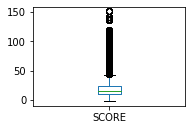

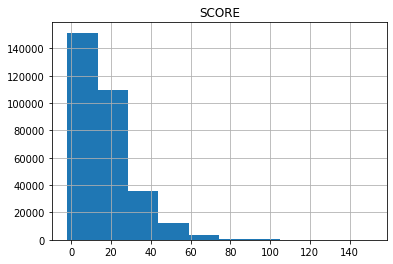

In [353]:
# box and whisker plots
results_an[['SCORE']].plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
pyplot.show()

results_an[['SCORE']].hist()
pyplot.show()

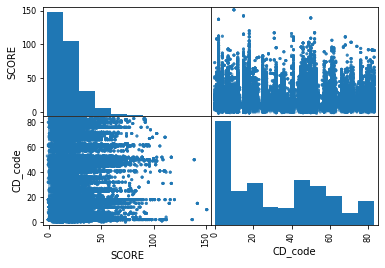

In [354]:
# scatter plot matrix
scatter_matrix(results_an)
pyplot.show()

# Evaluate Algorithm 
## The algorithm is designed to predict the score from the borough, cuisine type, and zipcode.

In [364]:
# Split-out validation dataset
array = results_an.values
array

array([[45, 30.0, 'MANHATTAN'],
       [45, 2.0, 'QUEENS'],
       [18, 46.0, 'STATEN ISLAND'],
       ...,
       [46, 25.0, 'MANHATTAN'],
       [2, 12.0, 'STATEN ISLAND'],
       [26, 9.0, 'BROOKLYN']], dtype=object)

In [365]:
X = array[:,0:2]
Y = array[:,2]

In [366]:
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=0.20, random_state=1)

Next step will be to try multiple different models, both linear and nonlinear to predict the score.

In [367]:
# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = StratifiedKFold(n_splits=2, random_state=1, shuffle=True)
	cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.398318 (0.000000)
LDA: 0.398318 (0.000000)
KNN: 0.400803 (0.003169)
CART: 0.466191 (0.000080)
NB: 0.397518 (0.000569)


KeyboardInterrupt: 

In [ ]:
# Compare Algorithms
pyplot.boxplot(results, labels=names)
pyplot.title('Algorithm Comparison')
pyplot.show()

In [ ]:
import pandasp